In [1]:
!unzip "/content/archive.zip"

Archive:  /content/archive.zip
  inflating: E Commerce Dataset.xlsx  


In [3]:
import pandas  as pd
df=pd.read_excel("/content/E Commerce Dataset.xlsx",sheet_name='E Comm')

In [4]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [5]:
[i for i in df.columns]


['CustomerID',
 'Churn',
 'Tenure',
 'PreferredLoginDevice',
 'CityTier',
 'WarehouseToHome',
 'PreferredPaymentMode',
 'Gender',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'PreferedOrderCat',
 'SatisfactionScore',
 'MaritalStatus',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [9]:
df1=pd.read_excel("/content/E Commerce Dataset.xlsx",sheet_name='Data Dict')

In [10]:
df1.drop(df1.columns[0:2],axis=1,inplace=True)

In [16]:
df1.columns=df1[0:1].values[0]

In [20]:
df1.drop(0,axis=0,inplace=True)

In [22]:
df1

,Variable,Discerption
1,CustomerID,Unique customer ID
2,Churn,Churn Flag
3,Tenure,Tenure of customer in organization
4,PreferredLoginDevice,Preferred login device of customer
5,CityTier,City tier
6,WarehouseToHome,Distance in between warehouse to home of customer
7,PreferredPaymentMode,Preferred payment method of customer
8,Gender,Gender of customer
9,HourSpendOnApp,Number of hours spend on mobile application or...
10,NumberOfDeviceRegistered,Total number of deceives is registered on part...


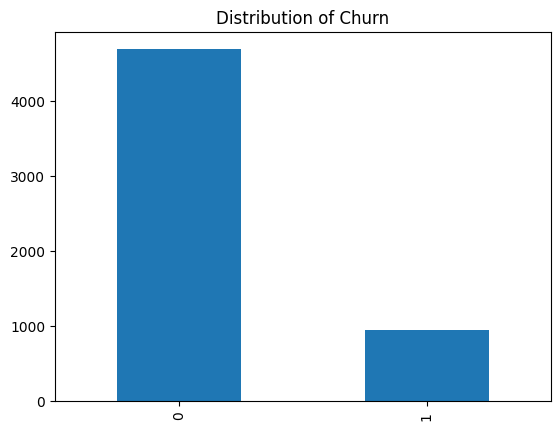

In [23]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title('Distribution of Churn')
plt.show()


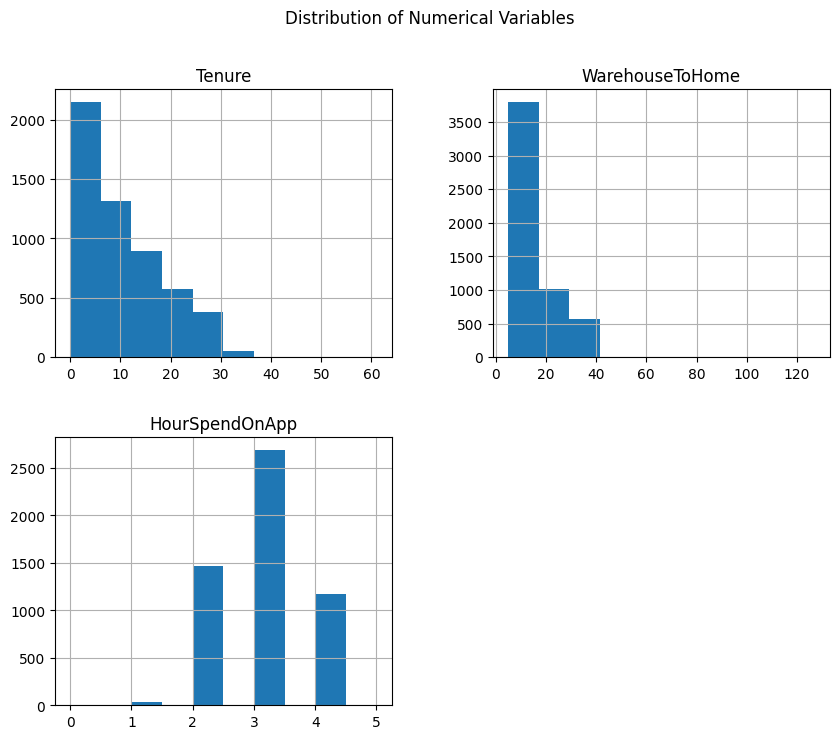

In [24]:
df[['Tenure', 'WarehouseToHome', 'HourSpendOnApp']].hist(figsize=(10, 8))
plt.suptitle('Distribution of Numerical Variables')
plt.show()


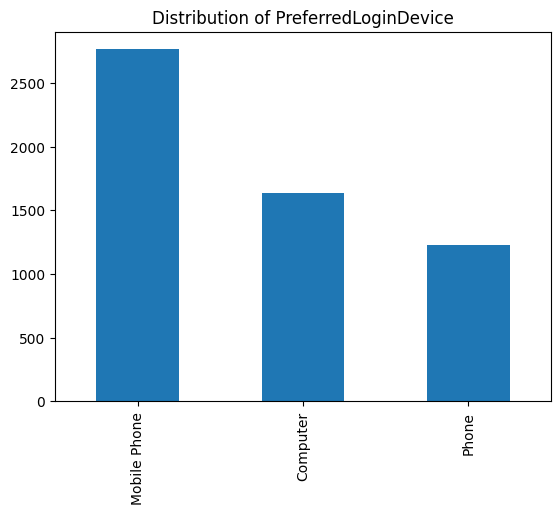

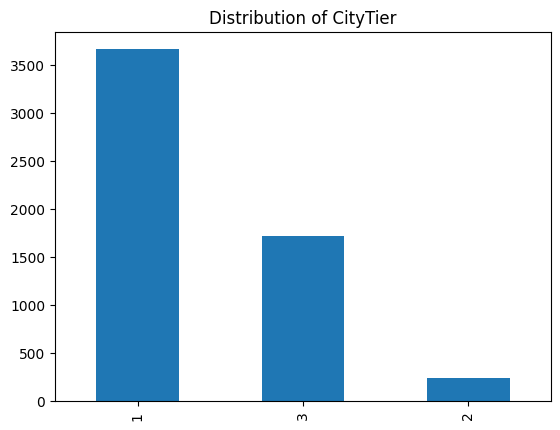

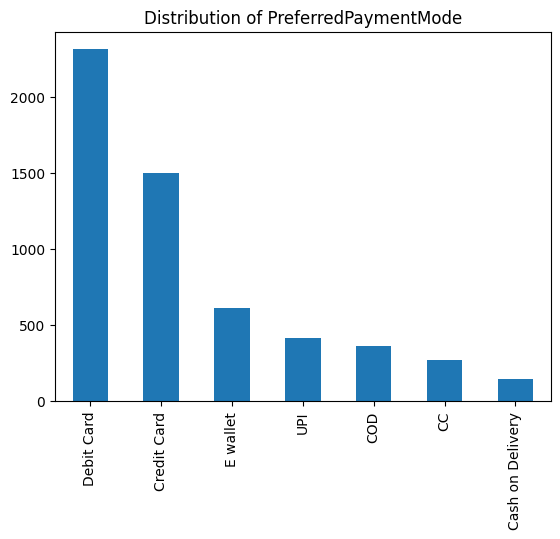

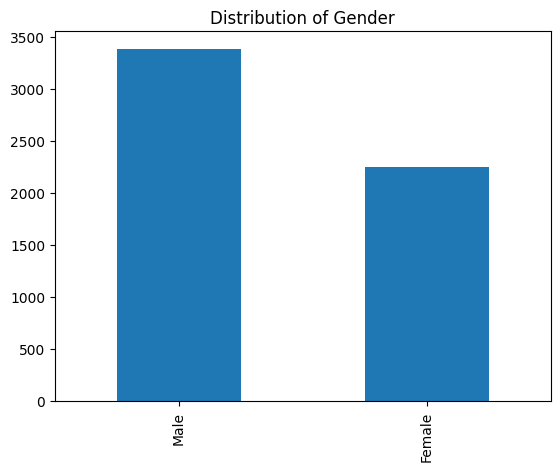

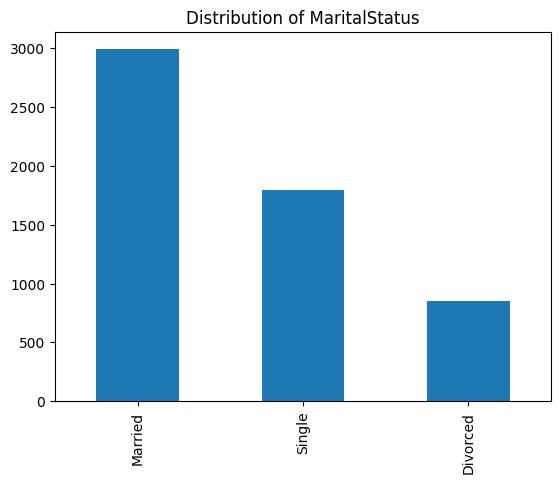

In [25]:
categorical_vars = ['PreferredLoginDevice', 'CityTier', 'PreferredPaymentMode', 'Gender', 'MaritalStatus']

for var in categorical_vars:
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.show()


<ipython-input-26-12443ac69226>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


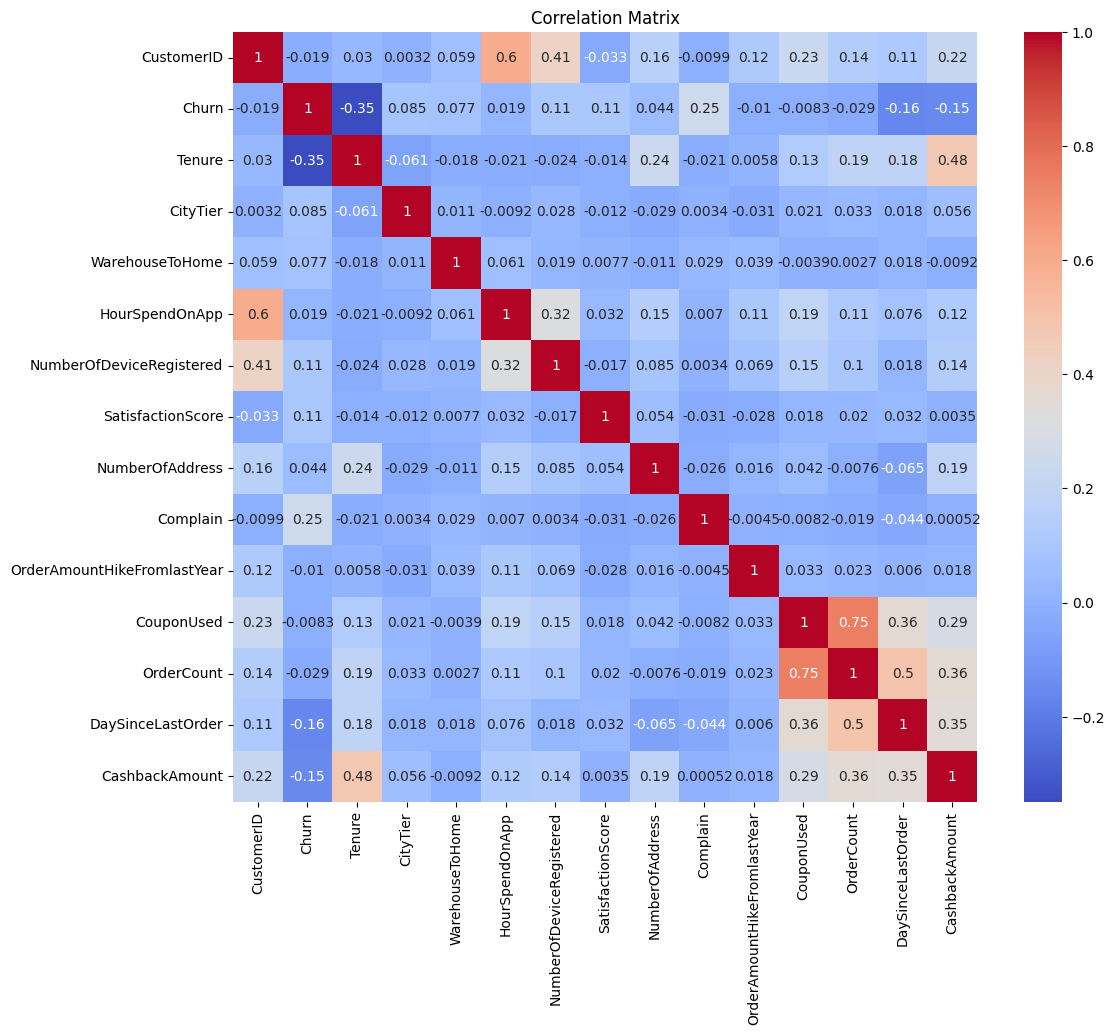

In [26]:
import seaborn as sns

correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


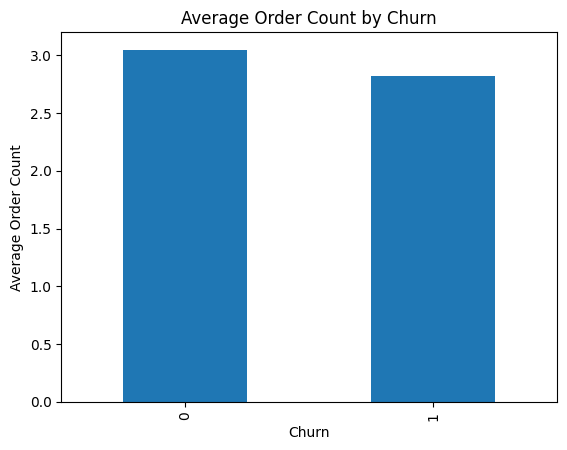

In [27]:
df.groupby('Churn')['OrderCount'].mean().plot(kind='bar')
plt.title('Average Order Count by Churn')
plt.ylabel('Average Order Count')
plt.show()


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Loop through each column in the dataframe
for col in df.columns:
    # Check if the data type of the column is object (string), which indicates it might be categorical
    if df[col].dtype == 'object':
        # Use the label encoder to transform the column
        df[col] = le.fit_transform(df[col])

# Display the transformed dataframe
print(df.head())

   CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                     1         3              6.0   
1       50002      1     NaN                     2         1              8.0   
2       50003      1     NaN                     2         1             30.0   
3       50004      1     0.0                     2         3             15.0   
4       50005      1     0.0                     2         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             NaN                         3   

   PreferedOrderCat  SatisfactionScore  MaritalSta

In [31]:
# Identify and display missing values
missing_values = df.isnull().sum()
print("Missing values before treatment:")
print(missing_values)

# Drop columns with more than 70% missing values
threshold = 0.7
df = df[df.columns[df.isnull().mean() < threshold]]

# Impute missing values for numerical columns with median
for col in df.columns:
    if df[col].dtype != 'object':  # Check if the column is numerical
        df[col].fillna(df[col].median(), inplace=True)

# Impute missing values for categorical columns with mode
for col in df.columns:
    if df[col].dtype == 'object':  # Check if the column is categorical
        df[col].fillna(df[col].mode()[0], inplace=True)
# Impute missing values for numerical columns (int and float) with median
numerical_data_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for col in df.columns:
    if df[col].dtype in numerical_data_types:
        df[col].fillna(df[col].median(), inplace=True)

# Display the result after treatment
print("\nMissing values after treatment:")
print(df.isnull().sum())

Missing values before treatment:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

Missing values after treatment:
CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                        

In [ ]:
####

In [32]:
df.isna().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [35]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Assuming 'Churn' is your target variable
X = df.drop('Churn', axis=1)  # Features (all columns except 'Churn')
y = df['Churn']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Count of classes before applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Count of classes after applying SMOTE
print("\nAfter SMOTE:")
print(y_train_resampled.value_counts())

Before SMOTE:
0    3510
1     712
Name: Churn, dtype: int64

After SMOTE:
0    3510
1    3510
Name: Churn, dtype: int64


In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Load the data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=10000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train models and gather metrics
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


                  Model  Precision    Recall  F1 Score  Accuracy
0   Logistic Regression   0.337121  0.754237  0.465969  0.710227
1         Decision Tree   0.639073  0.817797  0.717472  0.892045
2         Random Forest   0.828194  0.796610  0.812095  0.938210
3     Gradient Boosting   0.676724  0.665254  0.670940  0.890625
4              AdaBoost   0.508361  0.644068  0.568224  0.835938
5                   SVM   0.159184  0.495763  0.240989  0.476562
6   K-Nearest Neighbors   0.237052  0.504237  0.322493  0.644886
7  Gaussian Naive Bayes   0.269697  0.754237  0.397321  0.616477
8        Neural Network   0.183723  0.966102  0.308734  0.274858
9               XGBoost   0.903226  0.830508  0.865342  0.956676


In [44]:

# 1. AverageOrderValue
df['AverageOrderValue'] = df['CashbackAmount'] / df['OrderCount']

# 2. FrequencyOfComplaints (assuming monthly data)
# This is a placeholder. Actual implementation depends on your data structure.
# df['FrequencyOfComplaints'] = df['Number_of_months_with_complaints'] / 12

# 3. AverageSpendPerDevice
df['AverageSpendPerDevice'] = df['HourSpendOnApp'] / df['NumberOfDeviceRegistered']

# 4. LoyaltyScore
df['LoyaltyScore'] = (df['Tenure'] * df['SatisfactionScore'] * df['OrderCount']) / 100

# 5. IsFrequentShopper
df['IsFrequentShopper'] = df['DaySinceLastOrder'].apply(lambda x: 1 if x < 7 else 0)

# 6. DistanceTier
bins = [0, 10, 50, 1000]  # Example bins: 0-10 is Near, 10-50 is Medium, 50+ is Far
labels = ['Near', 'Medium', 'Far']
df['DistanceTier'] = pd.cut(df['WarehouseToHome'], bins=bins, labels=labels, right=False)

# 7. EngagementScore
df['EngagementScore'] = df['HourSpendOnApp'] * df['NumberOfDeviceRegistered']

# 8. CouponUsageRate
df['CouponUsageRate'] = df['CouponUsed'] / df['OrderCount']

# 9. ChurnRisk (simplified for the example)
df['ChurnRisk'] = df.apply(lambda row: 'High' if row['Churn'] == 1 and row['SatisfactionScore'] < 5 and row['DaySinceLastOrder'] > 30 else 'Low', axis=1)

# 10. AddressPerOrder
df['AddressPerOrder'] = df['NumberOfAddress'] / df['OrderCount']


In [45]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,CashbackAmount,AverageOrderValue,AverageSpendPerDevice,LoyaltyScore,IsFrequentShopper,DistanceTier,EngagementScore,CouponUsageRate,ChurnRisk,AddressPerOrder
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,...,159.93,159.93,1.00,0.08,1,Near,9.0,1.0,Low,9.0
1,50002,1,9.0,2,1,8.0,6,1,3.0,4,...,120.90,120.90,0.75,0.27,1,Near,12.0,0.0,Low,7.0
2,50003,1,9.0,2,1,30.0,4,1,2.0,4,...,120.28,120.28,0.50,0.27,1,Medium,8.0,0.0,Low,6.0
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,...,134.07,134.07,0.50,0.00,1,Medium,8.0,0.0,Low,8.0
4,50005,1,0.0,2,1,12.0,0,1,3.0,3,...,129.60,129.60,1.00,0.00,1,Medium,9.0,1.0,Low,3.0


In [49]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,...,CashbackAmount,AverageOrderValue,AverageSpendPerDevice,LoyaltyScore,IsFrequentShopper,DistanceTier,EngagementScore,CouponUsageRate,ChurnRisk,AddressPerOrder
0,50001,1,4.0,1,3,6.0,4,0,3.0,3,...,159.93,159.93,1.00,0.08,1,Near,9.0,1.0,Low,9.0
1,50002,1,9.0,2,1,8.0,6,1,3.0,4,...,120.90,120.90,0.75,0.27,1,Near,12.0,0.0,Low,7.0
2,50003,1,9.0,2,1,30.0,4,1,2.0,4,...,120.28,120.28,0.50,0.27,1,Medium,8.0,0.0,Low,6.0
3,50004,1,0.0,2,3,15.0,4,1,2.0,4,...,134.07,134.07,0.50,0.00,1,Medium,8.0,0.0,Low,8.0
4,50005,1,0.0,2,1,12.0,0,1,3.0,3,...,129.60,129.60,1.00,0.00,1,Medium,9.0,1.0,Low,3.0


In [52]:
df.dtypes

CustomerID                        int64
Churn                             int64
Tenure                          float64
PreferredLoginDevice              int64
CityTier                          int64
WarehouseToHome                 float64
PreferredPaymentMode              int64
Gender                            int64
HourSpendOnApp                  float64
NumberOfDeviceRegistered          int64
PreferedOrderCat                  int64
SatisfactionScore                 int64
MaritalStatus                     int64
NumberOfAddress                   int64
Complain                          int64
OrderAmountHikeFromlastYear     float64
CouponUsed                      float64
OrderCount                      float64
DaySinceLastOrder               float64
CashbackAmount                  float64
AverageOrderValue               float64
AverageSpendPerDevice           float64
LoyaltyScore                    float64
IsFrequentShopper                 int64
DistanceTier                   category


In [53]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Loop through each column in the dataframe
for col in df.columns:
    # Check if the data type of the column is object (string), which indicates it might be categorical
    if df[col].dtype == 'category':
        # Use the label encoder to transform the column
        df[col] = le.fit_transform(df[col])

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

# Load the data
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [55]:

# Display the transformed dataframe
print(df.head())

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Neural Network": MLPClassifier(max_iter=10000),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train models and gather metrics
results = []

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "Accuracy": accuracy
    })

# Convert results to DataFrame and display
results_df = pd.DataFrame(results)
print(results_df)

   CustomerID  Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                     1         3              6.0   
1       50002      1     9.0                     2         1              8.0   
2       50003      1     9.0                     2         1             30.0   
3       50004      1     0.0                     2         3             15.0   
4       50005      1     0.0                     2         1             12.0   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                     4       0             3.0                         3   
1                     6       1             3.0                         4   
2                     4       1             2.0                         4   
3                     4       1             2.0                         4   
4                     0       1             3.0                         3   

   ...  CashbackAmount  AverageOrderValue  Average

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


                  Model  Precision    Recall  F1 Score  Accuracy
0   Logistic Regression   0.380952  0.745763  0.504298  0.754261
1         Decision Tree   0.688889  0.788136  0.735178  0.904830
2         Random Forest   0.844749  0.783898  0.813187  0.939631
3     Gradient Boosting   0.686099  0.648305  0.666667  0.891335
4              AdaBoost   0.541219  0.639831  0.586408  0.848722
5                   SVM   0.162602  0.508475  0.246407  0.478693
6   K-Nearest Neighbors   0.234216  0.487288  0.316369  0.647017
7  Gaussian Naive Bayes   0.271429  0.724576  0.394919  0.627841
8        Neural Network   0.528226  0.555085  0.541322  0.842330
9               XGBoost   0.909910  0.855932  0.882096  0.961648


In [ ]:
                 Model  Precision    Recall  F1 Score  Accuracy
0   Logistic Regression   0.337121  0.754237  0.465969  0.710227
1         Decision Tree   0.639073  0.817797  0.717472  0.892045
2         Random Forest   0.828194  0.796610  0.812095  0.938210
3     Gradient Boosting   0.676724  0.665254  0.670940  0.890625
4              AdaBoost   0.508361  0.644068  0.568224  0.835938
5                   SVM   0.159184  0.495763  0.240989  0.476562
6   K-Nearest Neighbors   0.237052  0.504237  0.322493  0.644886
7  Gaussian Naive Bayes   0.269697  0.754237  0.397321  0.616477
8        Neural Network   0.183723  0.966102  0.308734  0.274858
9               XGBoost   0.903226  0.830508  0.865342  0.956676